In [5]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# mnist  자료 가져옴
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
X_train = X_train.astype('float64') /255
X_test = X_test.astype('float64') /255

In [ ]:
# 데이터 정규화,  카테고리 데이터 변환
# 모델 설계, 모델 실행
# 테스트 데이터로 모델 정확도 확인
# 검증과 학습 손실함수의 결과를 그래프로 표현

In [57]:
model = Sequential(Flatten(input_shape=(28, 28)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 1024)              803840    
                                                                 
 dense_25 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024,activation='relu'),
    (Dense(10, activation='softmax')] )

In [58]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1831 - accuracy: 0.9450
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0739 - accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0493 - accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0248 - accuracy: 0.9922


In [59]:
#  정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9802
테스트 정확도: 0.9801999926567078


In [60]:
loss, accuracy = [], []
for i in range(10):
    model.fit(X_train, y_train, epochs=1)
    loss.append(model.evaluate(X_test, y_test)[0])
    accuracy.append(model.evaluate(X_test, y_test)[1])

print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9775
[0.9811000227928162, 0.9769999980926514, 0.9821000099182129, 0.9835000038146973, 0.9799000024795532, 0.9825000166893005, 0.9785000085830688, 0.9800999760627747, 0.9812999963760376, 0.9775000214576721]


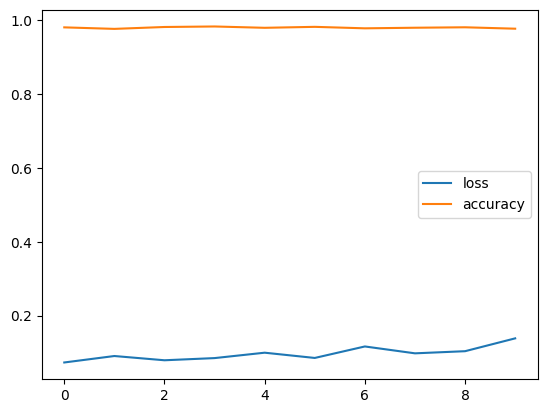

In [61]:
x_len = np.arange(len(loss))
plt.plot(x_len, loss, label='loss')
plt.plot(x_len, accuracy, label='accuracy')
plt.legend()
plt.show()

In [62]:
# 딥러닝 실행 후 테스트 정확도 결과 확인
# 클래스 확인
# 0 : T-shirt/top, 1 : Trouser, 2 : Pullover, 3 : Dress, 4 : Coat, 5 : Sandal
# 6 : Shirt, 7 : Sneaker, 8 : Bag, 9 : Ankel boot
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


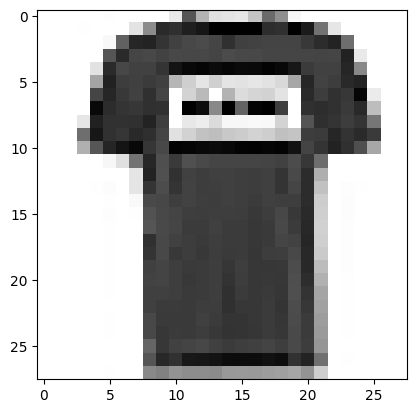

In [65]:
plt.imshow(X_train[1], cmap='Greys')